<a href="https://colab.research.google.com/github/kimdesok/Introduction-to-TensorFlow-for-Artificial-Intelligence-Machine-Learning-and-Deep-Learning-Coursera/blob/master/C2/C2_W2_Lab_1_cats_v_dogs_augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
#Download the dataset
!wget 'https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip'

--2022-06-04 08:37:37--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.164.176, 172.217.2.112, 172.217.1.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.164.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.1’

cats_and_dogs_filte 100%[===================>]  65.43M   257MB/s    in 0.3s    

2022-06-04 08:37:37 (257 MB/s) - ‘cats_and_dogs_filtered.zip.1’ saved [68606236/68606236]



In [75]:
import os
import zipfile

zip_ref=zipfile.ZipFile('./cats_and_dogs_filtered.zip')
zip_ref.extractall('tmp/')
zip_ref.close()

base_dir='./tmp/cats_and_dogs_filtered'
train_dir=os.path.join(base_dir, 'train')
validation_dir=os.path.join(base_dir,'validation')
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')




In [76]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


def create_model():

  model = tf.keras.models.Sequential([
    
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2, 2),
    Conv2D(128, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  return model

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale = 1/255 )

train_generator = train_datagen.flow_from_directory(
    train_dir, target_size=(150,150), batch_size=20, class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [78]:
# Constant for epochs
EPOCHS = 50

# Create a new model
model = create_model()

history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
100/100 - 67s - loss: 0.6868 - accuracy: 0.5480 - val_loss: 0.6646 - val_accuracy: 0.6070 - 67s/epoch - 673ms/step
Epoch 2/50
100/100 - 8s - loss: 0.6604 - accuracy: 0.6005 - val_loss: 0.6315 - val_accuracy: 0.6580 - 8s/epoch - 85ms/step
Epoch 3/50
100/100 - 8s - loss: 0.6180 - accuracy: 0.6480 - val_loss: 0.6183 - val_accuracy: 0.6720 - 8s/epoch - 85ms/step
Epoch 4/50
100/100 - 8s - loss: 0.5778 - accuracy: 0.6910 - val_loss: 0.5837 - val_accuracy: 0.7030 - 8s/epoch - 84ms/step
Epoch 5/50
100/100 - 8s - loss: 0.5530 - accuracy: 0.7090 - val_loss: 0.5775 - val_accuracy: 0.7060 - 8s/epoch - 83ms/step
Epoch 6/50
100/100 - 8s - loss: 0.5174 - accuracy: 0.7475 - val_loss: 0.6291 - val_accuracy: 0.6410 - 8s/epoch - 84ms/step
Epoch 7/50
100/100 - 8s - loss: 0.4927 - accuracy: 0.7625 - val_loss: 0.6326 - val_accuracy: 0.6690 - 8s/epoch - 83ms/step
Epoch 8/50
100/100 - 8s - loss: 0.4606 - accuracy: 0.7885 - val_loss: 0.5392 - val_accuracy: 0.7290 - 8s/epoch - 83ms/step
Epoch 9/50
10

[0.5479999780654907, 0.6004999876022339, 0.6480000019073486, 0.6909999847412109, 0.7089999914169312, 0.7475000023841858, 0.762499988079071, 0.7885000109672546, 0.8029999732971191, 0.8040000200271606, 0.8305000066757202, 0.8464999794960022, 0.8454999923706055, 0.859000027179718, 0.8765000104904175, 0.8840000033378601, 0.8980000019073486, 0.9089999794960022, 0.9284999966621399, 0.9294999837875366, 0.9424999952316284, 0.9505000114440918, 0.953000009059906, 0.9710000157356262, 0.9660000205039978, 0.9745000004768372, 0.9754999876022339, 0.9775000214576721, 0.984499990940094, 0.9865000247955322, 0.9884999990463257, 0.9929999709129333, 0.996999979019165, 0.9929999709129333, 0.9944999814033508, 0.9925000071525574, 0.9934999942779541, 0.996999979019165, 0.9940000176429749, 0.9959999918937683, 0.9955000281333923, 0.9980000257492065, 0.996999979019165, 0.9934999942779541, 0.9984999895095825, 0.9950000047683716, 0.9980000257492065, 0.996999979019165, 0.9959999918937683, 0.996999979019165]
[0.60699

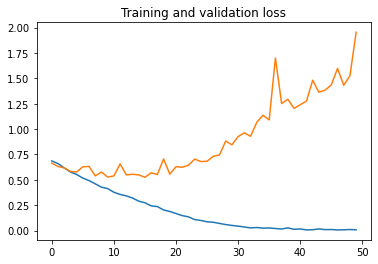

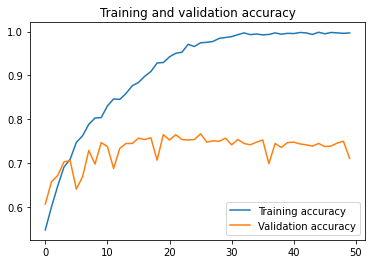

In [79]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))
  print(epochs)

  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Validation Loss')
  plt.title('Training and validation loss')

  plt.figure()

  plt.plot(epochs, acc, label='Training accuracy')
  plt.plot(epochs, val_acc, label='Validation accuracy')
  plt.title('Training and validation accuracy')
  plt.legend()

  plt.show()

# Plot training results
print(history.history['accuracy'])
print(history.history['val_accuracy'])

plot_loss_acc(history)

In [80]:
model_for_aug = create_model()
 #data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [81]:
# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/50
100/100 - 17s - loss: 0.6913 - accuracy: 0.5155 - val_loss: 0.6666 - val_accuracy: 0.6100 - 17s/epoch - 175ms/step
Epoch 2/50
100/100 - 17s - loss: 0.6735 - accuracy: 0.5660 - val_loss: 0.6414 - val_accuracy: 0.6190 - 17s/epoch - 165ms/step
Epoch 3/50
100/100 - 16s - loss: 0.6597 - accuracy: 0.5900 - val_loss: 0.6224 - val_accuracy: 0.6430 - 16s/epoch - 165ms/step
Epoch 4/50
100/100 - 16s - loss: 0.6291 - accuracy: 0.6475 - val_loss: 0.6489 - val_accuracy: 0.6010 - 16s/epoch - 165ms/step
Epoch 5/50
100/100 - 16s - loss: 0.6237 - accuracy: 0.6460 - val_loss: 0.5755 - val_accuracy: 0.7020 - 16s/epoch - 164ms/step
Epoch 6/50
100/100 - 16s - loss: 0.6093 - accuracy: 0.6735 - val_loss: 0.6651 - val_accuracy: 0.6140 - 16s/epoch - 164ms/step
Epoch 7/50
100/100 - 16s - loss: 0.5932 - accuracy: 0.6850 - val_loss: 0.6034 - val_accuracy: 0.6850 - 16s/epoch - 165ms/step
Epoch 8/50
100/100 - 16s - loss: 0.6018 - accuracy: 0.6710 - val_loss: 0.5908 - val_accuracy: 0.6660 - 16s/epoch - 164

range(0, 50)


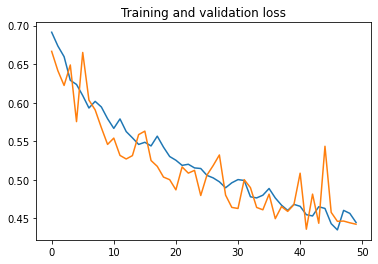

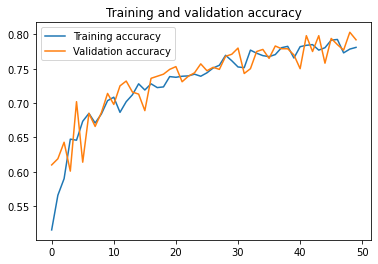

In [82]:
plot_loss_acc(history_with_aug)